In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster, datasets, metrics
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt

In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

<Figure size 864x864 with 0 Axes>

3418.5195940060444


Text(0.5, 1.0, 'Incorrect Number of Blobs')

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

Text(0.5, 1.0, 'Unequal Variance')

Text(0.5, 1.0, 'Unevenly Sized Blobs')

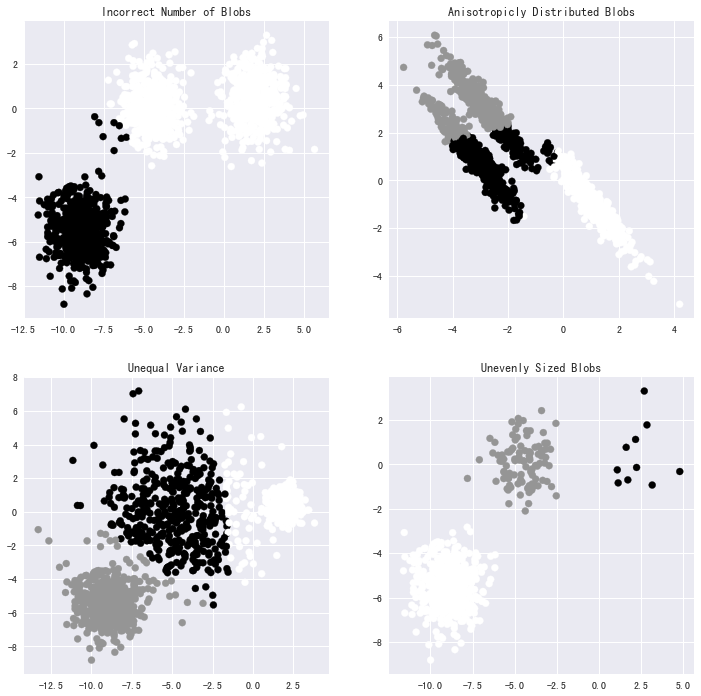

In [20]:
plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
# 这个数据集分3簇会更好一些 或者使用密度聚类也凑合
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
# y_pred = cluster.DBSCAN().fit_predict(X)
# 3418.5195940060444
# kmeans 2簇 3418.5 3簇10633.8  dbscan 4546.2
print(metrics.calinski_harabasz_score(X, y_pred))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Incorrect Number of Blobs')

# 变换数据
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")


X_varied, y_varied = datasets.make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

y_pred = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# 不均匀数据
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = cluster.KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

(1500, 2)

(1500, 2)